<a href="https://colab.research.google.com/github/fimoziq/unecozik/blob/main/5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.optimize import minimize
from statsmodels.tsa.stattools import adfuller

In [35]:
df = read_csv('BAKA1.csv',parse_dates = True, index_col = 0,delimiter=';',decimal=',')
df.head()

,доход
дата,
2007-01-01,139.11
2007-02-01,136.97
2007-03-01,131.70
2007-04-01,120.63
2007-05-01,120.23


In [36]:
df_columns, df.columns = df.columns, ('y', )
df_index, df.index.name = df.index.name, 'date'
df.head()

,y
date,
2007-01-01,139.11
2007-02-01,136.97
2007-03-01,131.70
2007-04-01,120.63
2007-05-01,120.23


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2007-01-01 to 2010-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [38]:
len(df)

48

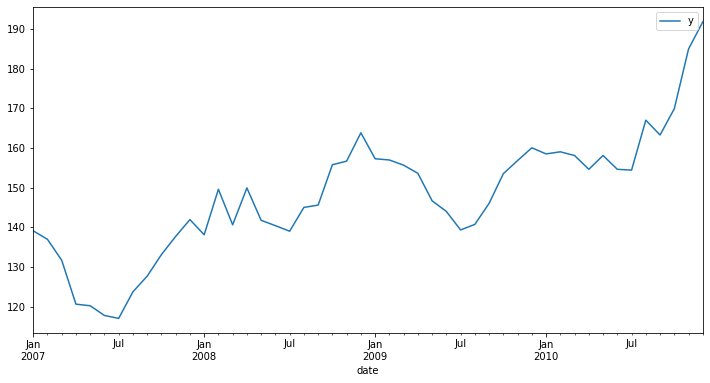

In [39]:
df.plot(figsize=(12,6))
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


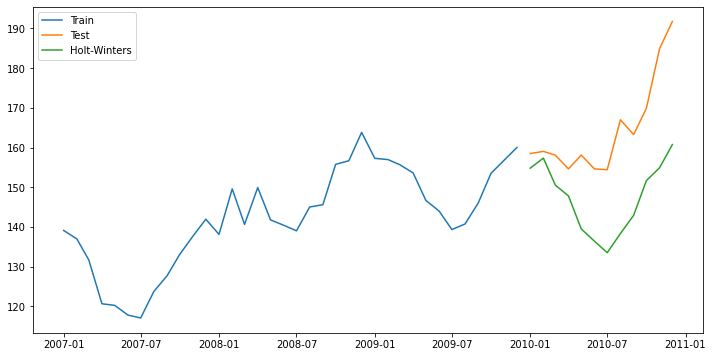

In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train, test = df.iloc[:36], df.iloc[36:]
model = ExponentialSmoothing(train.values, seasonal='mul', seasonal_periods=12).fit()
pred = model.predict(start=len(train), end=len(test)+len(train)-1)

plt.figure(figsize=(12,6))

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, pred, label='Holt-Winters')
plt.legend(loc='best')

In [41]:
model.summary()

Dep. Variable:,endog,No. Observations:,36
Model:,ExponentialSmoothing,SSE,628.396
Optimized:,True,AIC,130.947
Trend:,None,BIC,153.117
Seasonal:,Multiplicative,AICC,159.579
Seasonal Periods:,12,Date:,"Tue, 12 Oct 2021"
Box-Cox:,False,Time:,12:31:50
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7368421,alpha,True
smoothing_seasonal,0.2631579,gamma,True


^мультипликативные сезонные коэффициенты
^SSE-сумма квадратов ошибок
^период - 12

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [46]:
X = np.array(range(1,df.shape[0]+1)).reshape(df.shape[0],1)
X[0:5]

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [47]:
assert len(X)==len(y)
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
coefs = model.coef_
coefs

array([0.92934379])

In [49]:
const = model.intercept_
const

125.11920212765958

In [50]:
y_pred = model.predict(X) 
y_pred[0:5]

array([126.04854592, 126.97788971, 127.9072335 , 128.83657729,
       129.76592108])

In [52]:
sst = (np.array([y-y.mean()])**2).sum()
sse = (np.array([y-y_pred])**2).sum()
ssr = (np.array([y_pred-y.mean()])**2).sum()
R2 = 1 - sse/sst
R2

0.6899561843251006

^коэф детерминации


In [53]:
MAPE = abs([y-y_pred]/y_pred).sum()*100/len(y)
MAPE

4.712733352791392

средняя ошибка аппроксимации

In [54]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y)

74.4846971763506

среднеквадратичная ошибка вычислений